# Comentarios iniciales


Este cuaderno de Jupyter se encuentra estructurado de la siguiente manera: cada problema de la tarea posee su módulo asociado, por ejemplo, ```P1_funciones.py```, el cual es necesario importar para ejecutar los cálculos y generar los gráficos presentes en cada una de las celdas de este cuadernillo. No es necesario importar todos los módulos juntos a la vez, de hecho, es recomendado no importarlos juntos ya que pueden haber funciones para distintos problemas, presentes en diferentes módulos, que posean un mismo nombre. **Para evitar cualquier conflicto, se recomienda importar cada módulo por separado a medida que se vayan corriendo las celdas para cada problema.** 

>En particular, en el **problema 3**, se utilizó el módulo ```joblib``` para correr el código en múltiples núcleos de la CPU, se debe ajustar el parámetro ```n_chains``` presente en algunas de las funciones del archivo ```P3_funciones.py``` acorde a la cantidad de núcleos del procesador que se deseen utilizar, en mi caso, mi laptop tenía 8 núcleos.

# Problema 1

In [2]:
from P1_funciones import *

## a)

Cálculo de ```direct-pi``` tomando $N = 10^1 \dots 10^8$ y 40 runs por cada N.

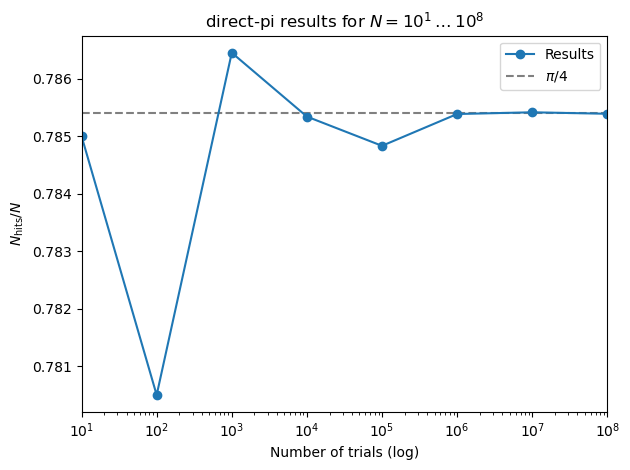

In [4]:
plot_direct_pi(n_runs=20, max_power=8, fig_name="plot_1a")

Mientras que para la desviación cuadrática media:

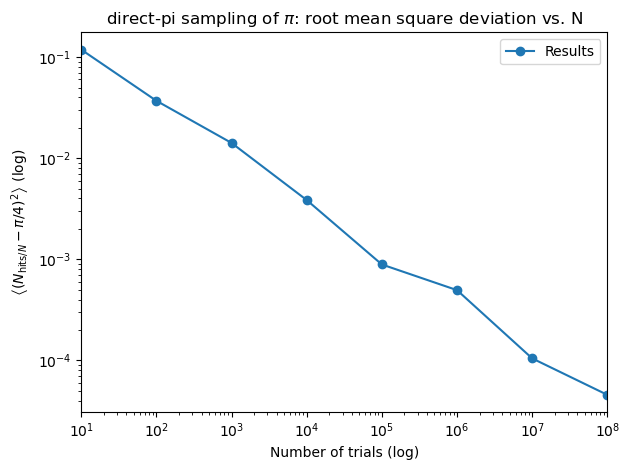

In [5]:
plot_direct_pi_msqrt_dev(n_runs=20, max_power=8, fig_name="plot_1a_desv")

Como podemos notar, la desviación cuadrática media decae de manera exponencial a medida que $N$ aumenta.

## b)

Comenzamos por verificar si utilizando $\delta = 0.3$ converge a $\pi/4$ utilizando $N_\text{trials} = 10^1 \dots 10^6$ y 20 runs.

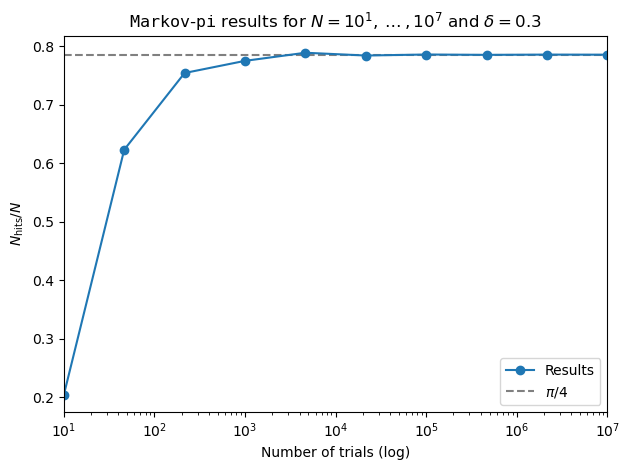

In [3]:
plot_markov_pi(50, 0.3, "plot_P1b")

Ahora examinamos cómo se comporta la desviación cuadrática media y la tasa de rechazo para una lista de posibles $\delta$'s, tomando $N_{\text{trials}}$ desde $2^{4}$ hasta $2^{12}$, con un número fijo de $N_\text{runs} = 1000$ para cada $N_{\text{trials}}$.

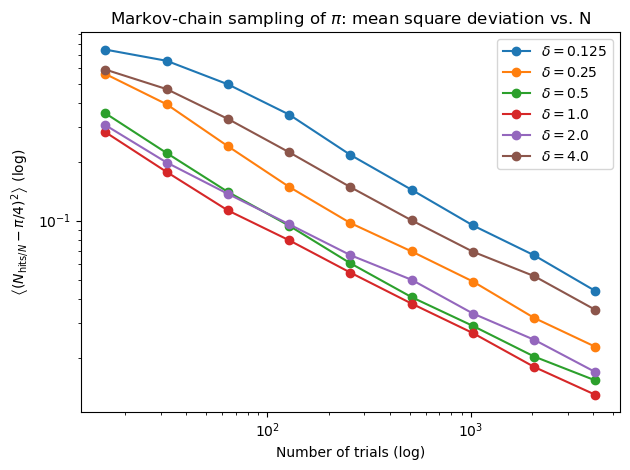

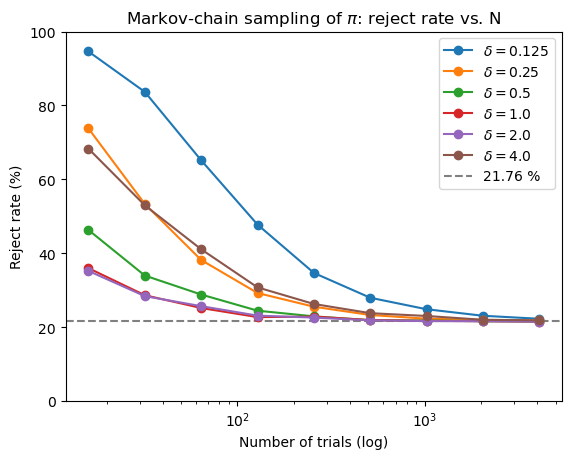

In [7]:
n_runs = 1000
delta_list = [0.125, 0.25, 0.500, 1.000, 2.000, 4.000]
plot_markov_pi_msqrt_dev_delta_list(n_runs, delta_list, "plot_P1b_diff_deltas")
plot_markov_pi_rejected(n_runs, delta_list, "plot_P1b_reject_rate")

**Conclusión:** para $\delta = 1.0$ se logra ver que la diferencia cuadrática media es menor, junto que la tasa de rechazo es menor que los otros valores comparados. La línea de comparación corresponde a la fracción de área de un cuarto de cículo respecto a un cuadrado unitario:
$$1 - \frac{A_{\text{círculo}/4}}{A_\text{cuadrado}} = 1 - \frac{\pi / 4}{1} \approx 0.2146$$
por lo tanto, a medida que aumenta el número de trials, es razonable esperar que se vaya cubriendo toda el área del cuadrado unitario y que la taza de rechazo se estabilice en dicho valor.

# Problema 2

In [4]:
from P2_funciones import *

## a)

Por ejemplo, para el caso de una red de 2x2, con un total de 4 spines, las 16 combinaciones posibles se ven de la siguiente forma

In [5]:
for spin_iteration in gray_show_binary(4):
    print(spin_iteration)

[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 1, 1]
[0, 0, 1, 0]
[0, 1, 1, 0]
[0, 1, 1, 1]
[0, 1, 0, 1]
[0, 1, 0, 0]
[1, 1, 0, 0]
[1, 1, 0, 1]
[1, 1, 1, 1]
[1, 1, 1, 0]
[1, 0, 1, 0]
[1, 0, 1, 1]
[1, 0, 0, 1]
[1, 0, 0, 0]


Lo cual es análogo al caso de la tabla de la slide 14, clase 5.

### Cálculos de densidad de estados (DoS) para las distintas, con y sin condiciones de borde periódicas (PBC).

> Debido a limitaciones del sistema en el cual fue escrito y corrido el código, solo se pudo calcular hasta una grilla de 5x5 para PBC y non-PBC.

#### non-PBC

In [3]:
dos2x2 = enumerate_ising(2, periodicity=False)
dos3x3 = enumerate_ising(3, periodicity=False)
dos4x4 = enumerate_ising(4, periodicity=False)
dos5x5 = enumerate_ising(5, periodicity=False)

#### PBC

In [4]:
dos2x2_periodic = enumerate_ising(2, periodicity=True)
dos3x3_periodic = enumerate_ising(3, periodicity=True)
dos4x4_periodic = enumerate_ising(4, periodicity=True)
dos5x5_periodic = enumerate_ising(5, periodicity=True)

### Histogramas

#### non-PBC

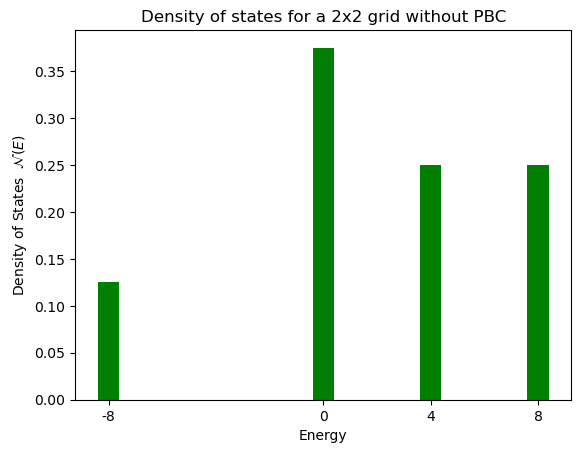

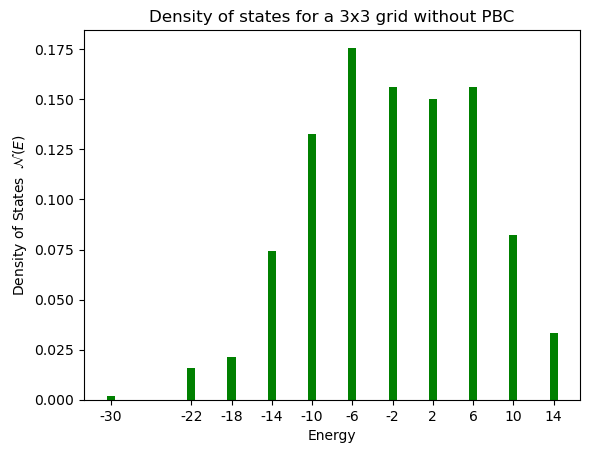

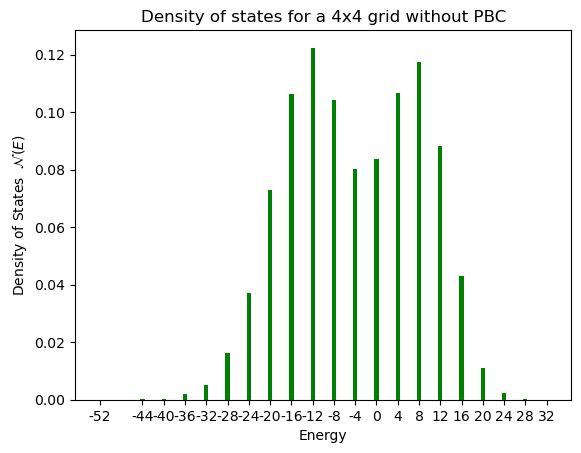

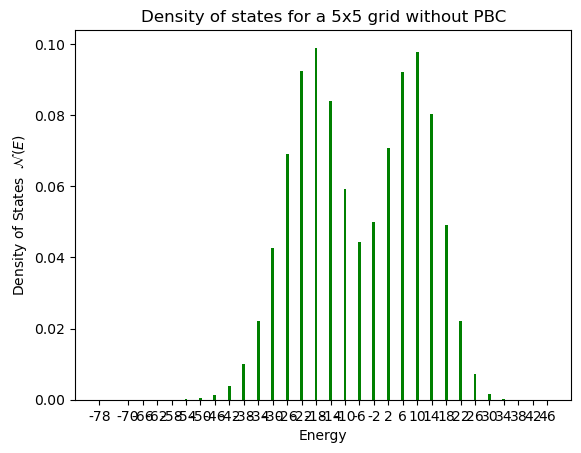

In [5]:
plot_dos_ising(2, dos2x2, fig_name="plot_P2b_dos2x2")
plot_dos_ising(3, dos3x3, fig_name="plot_P2b_dos3x3")
plot_dos_ising(4, dos4x4, fig_name="plot_P2b_dos4x4")
plot_dos_ising(5, dos5x5, fig_name="plot_P2b_dos5x5")

Como podemos notar, a medida que aumenta el tamaño de la grilla, es posible ver que comienza a formarse una distribución bimodal. Para redes con $L$ par esta está centrada en $E=0$.

#### PBC

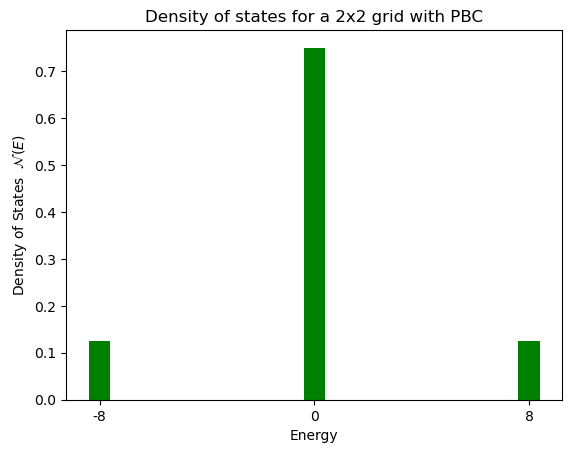

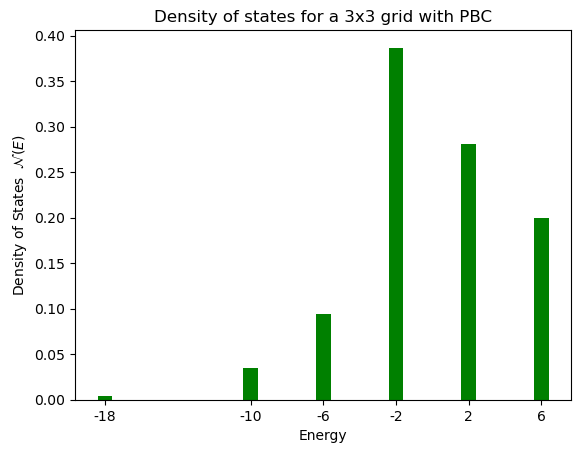

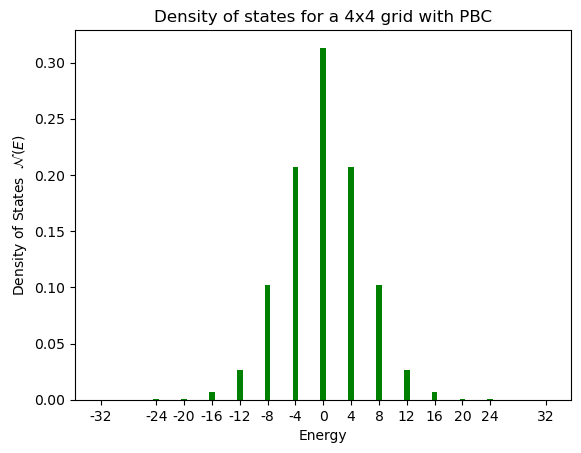

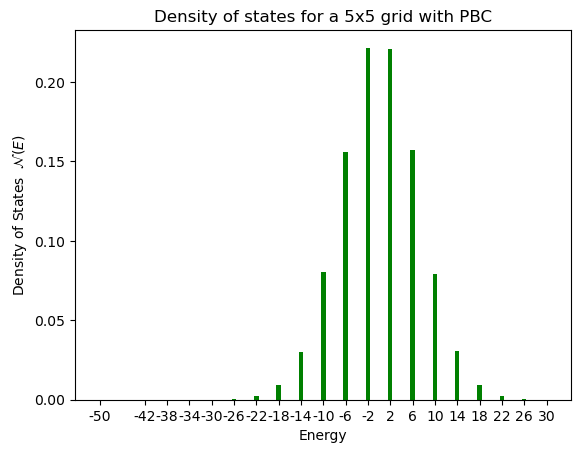

In [6]:
plot_dos_ising(2, dos2x2_periodic, periodicity=True, fig_name="plot_P2b_dos2x2_periodic")
plot_dos_ising(3, dos3x3_periodic, periodicity=True, fig_name="plot_P2b_dos3x3_periodic")
plot_dos_ising(4, dos4x4_periodic, periodicity=True, fig_name="plot_P2b_dos4x4_periodic")
plot_dos_ising(5, dos5x5_periodic, periodicity=True, fig_name="plot_P2b_dos5x5_periodic")

Mientras que en este caso, podemos notar que la distribución es completamente unimodal, nuevamente para $L$ se encuentra centrada en $E=0$.

## b)

Verificamos las sumas sobre la magnetización correspondientes a cada energía en $\mathcal{N}(E,M)$, con el fin de comparar con la tabla de la slide 15, clase 5

In [2]:
print("Table for L = 2")
check_e_sum(enumerate_ising_magnetization(2, True)[1])
print("+--------------------+")
print("Table for L = 3")
check_e_sum(enumerate_ising_magnetization(3, True)[1])
print("+--------------------+")
print("Table for L = 4")
check_e_sum(enumerate_ising_magnetization(4, True)[1])
print("+--------------------+")
print("Table for L = 5")
check_e_sum(enumerate_ising_magnetization(5, True)[1])

Table for L = 2
-8 2
0 12
8 2
+--------------------+
Table for L = 3
-18 2
-10 18
-6 48
-2 198
2 144
6 102
+--------------------+
Table for L = 4
-32 2
-24 32
-20 64
-16 424
-12 1728
-8 6688
-4 13568
0 20524
4 13568
8 6688
12 1728
16 424
24 32
20 64
32 2
+--------------------+
Table for L = 5
-50 2
-42 50
-38 100
-34 850
-30 3140
-26 16300
-22 74500
-18 311800
-14 1014900
-10 2696080
-6 5230300
-2 7431800
2 7413900
6 5276500
10 2645740
14 1024150
18 314300
22 82750
26 14800
30 2470


### Histogramas de la magnetización para distintas temperaturas

Posterior a esto, podemos generar los histogramas para las distribuciones de probabilidad $\pi_M$ en función de la temperatura:

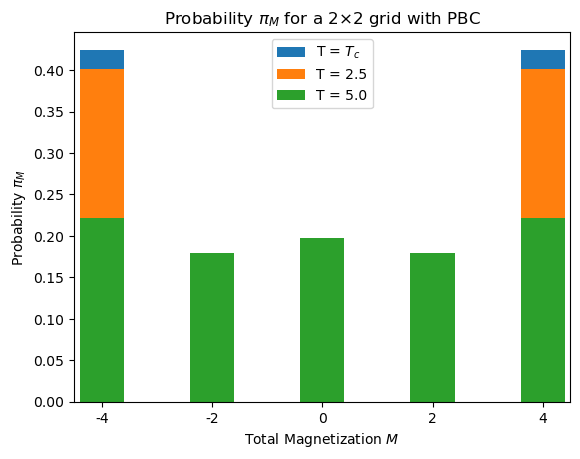

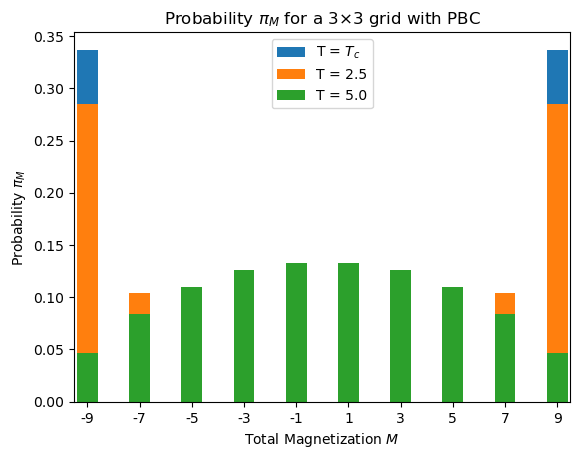

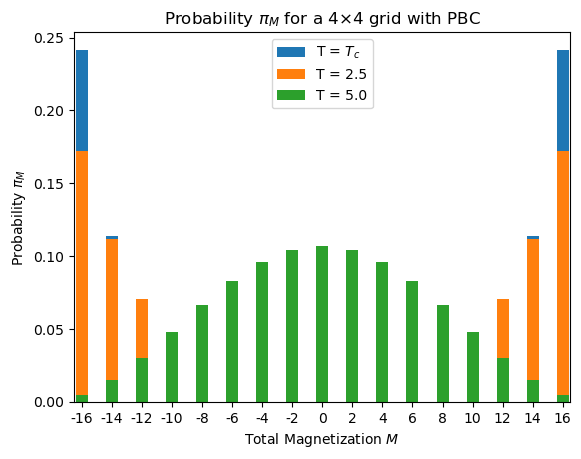

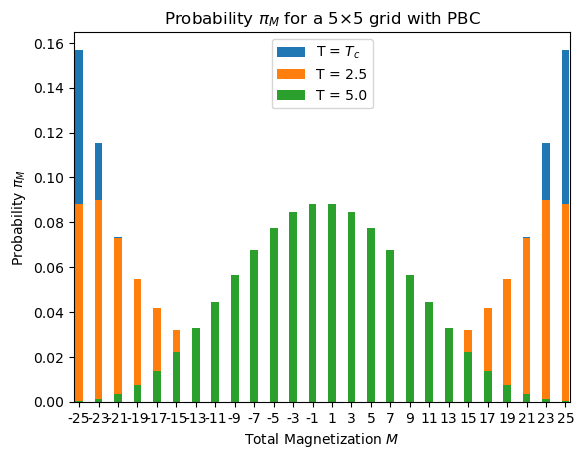

In [9]:
plot_magnetization_probability(2, fig_name="hist_P2b_pi_M_2x2_periodic")
plot_magnetization_probability(3, fig_name="hist_P2b_pi_M_3x3_periodic")
plot_magnetization_probability(4, fig_name="hist_P2b_pi_M_4x4_periodic")
plot_magnetization_probability(5, fig_name="hist_P2b_pi_M_5x5_periodic")

Podemos notar que a medida que aumenta la temperatura, pasamos de un modo bimodal a uno unimodal, sin embargo, eso no se aprecia de manera directa en $T_c$, ya que nos mantenemos en un modo bimodal para todas las grillas.

### Gráfico de Binder cumulant para las distintas grillas

Analizaremos el Binder cumulant para las distintas grillas, dado por la expresión
$$B(T) = \frac{1}{2}\left[3 - \frac{\left\langle m^4 (T)\right\rangle}{\left\langle m^2 (T)\right\rangle^2}\right]$$

#### Caso sin PBC

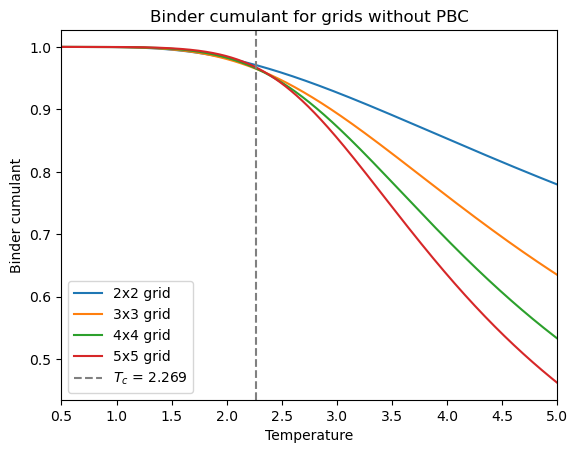

In [3]:
plot_Binder_cumulant(periodicity=False, fig_name="plot_P2b_Binder_cumulant")

#### Caso con PBC 

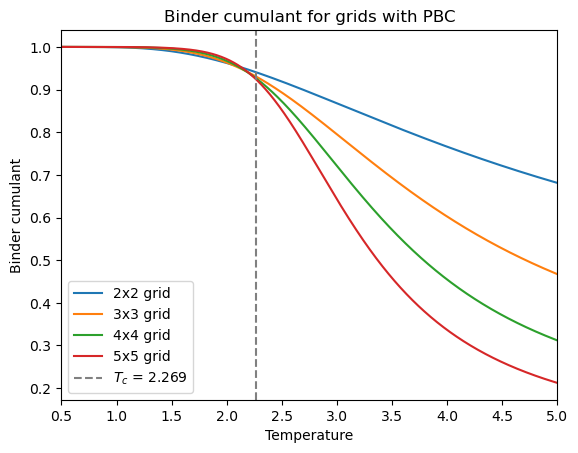

In [4]:
plot_Binder_cumulant(fig_name="plot_P2b_Binder_cumulant_periodic")

Para ambos casos, se cruzan cerca de $T_c = \frac{2}{\log(1+\sqrt{2})} \approx 2.269$, aunque para non-PBC se encuentra más cerca.

# Problema 3

In [10]:
from P3_funciones import *

Verificamos la energía media  y el calor específico $c_V$ para una red de 6x6 con condiciones de borde periódicas utilizando $T=2.0$ con el fin de comparar con los valores de la tabla presente en la slide 17, clase 5.

In [1]:
L = 6
T = 2.0
for run in range(1, 6):
    e_avg, c_V, _ = parallel_thermo_markov_ising(L, T)
    print(f"Run: {run}, <E/N> = {e_avg:.5f}, c_V = {c_V:.5f}")

Run: 1, <E/N> = -1.74772, c_V = 0.70854
Run: 2, <E/N> = -1.74339, c_V = 0.70234
Run: 3, <E/N> = -1.74638, c_V = 0.70266
Run: 4, <E/N> = -1.74142, c_V = 0.72948
Run: 5, <E/N> = -1.74492, c_V = 0.70737


Como podemos notar, los valores para $\left\langle e \right\rangle$ son muy similares, mientras que, si bien son similares, los obtenidos para $c_V$ presentan mayor variación respecto a los presentados en la tabla de referencia.

In [ ]:
plot_absolute_magnetization(L_values=[4, 8, 16, 32], T_steps=20, fig_name="plot_magnetizations_P3")

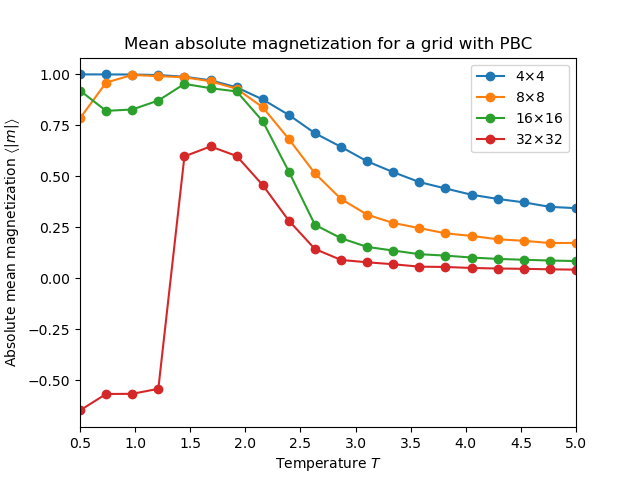

Es posible notar que para la grilla de 32x32 tenemos resultados no esperados, en particular la presencia de valores negativos para magnetización absoluta, esto se puede deber a que al realizar el cálculo se presentó el error:
```RuntimeWarning: overflow encountered in scalar add M_avg = sum(r[2] for r in results) / N_samples```
Uno de los problemas vistos en distintas iteraciones del código fue el uso de ```N_samples``` que se utiliza para correr cada configuración, ya que a medida que aumenta el tamaño de la lattice, se vió que también lo debe hacer el número de samples para tener una curva *suave*. Sin embargo, aparentemente debido a limitaciones del sistema en el cual se realizaron los cálculos, se tuvo que jugar con ```N_samples``` para que se ejecutara en un tiempo razonable de tiempo (este gráfico tomó cerca de 4 horas).

# Problema 4

In [17]:
from P4_funciones import *

Nuevamente comenzamos por verificar los cálculos para la energía media $\left\langle e \right\rangle$ y calor específico $c_V$ para una grilla de 6x6 variando la temperatura.

In [16]:
from P4_funciones import *

L = 6
T_values = np.linspace(0.5, 4.0, 8)
results = cluster_ising(L, T_values)

for T, e_avg, c_v in results:
    print(f"T = {T:.1f}, <e> = {e_avg:.4f}, c_V = {c_v:.5f}")

T = 0.5, <e> = -2.0000, c_V = 0.00000
T = 1.0, <e> = -1.9970, c_V = 0.02482
T = 1.5, <e> = -1.9510, c_V = 0.19858
T = 2.0, <e> = -1.7452, c_V = 0.70124
T = 2.5, <e> = -1.2821, c_V = 1.00153
T = 3.0, <e> = -0.8866, c_V = 0.55494
T = 3.5, <e> = -0.6857, c_V = 0.29737
T = 4.0, <e> = -0.5665, c_V = 0.18782


Como podemos notar, los resultados obtenidos concuerdan bastante bien respecto a los presentados en la tabla de la slide 17, clase 5.

### Histogramas de magnetización y gráfico de Binder cumulant para grillas de 6x6, 16x16, 32x32 y 64x64

In [ ]:
from P4_funciones import *
T_values = np.linspace(0.5, 4.0, 14)

binder_cumulants_dict = {}
for L in [6, 16, 32, 64]:
    _, magnetization_histograms, binder_cumulants = cluster_ising(L, T_values)
    hist_magnetization(L, T_values, magnetization_histograms)
    binder_cumulants_dict[L] = binder_cumulants

plot_Binder_Cumulants(T_values, binder_cumulants_dict)

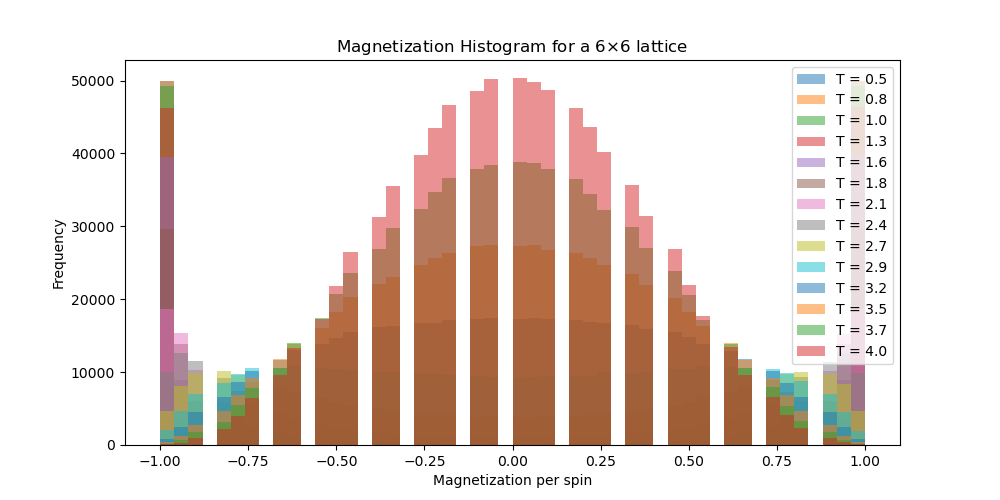
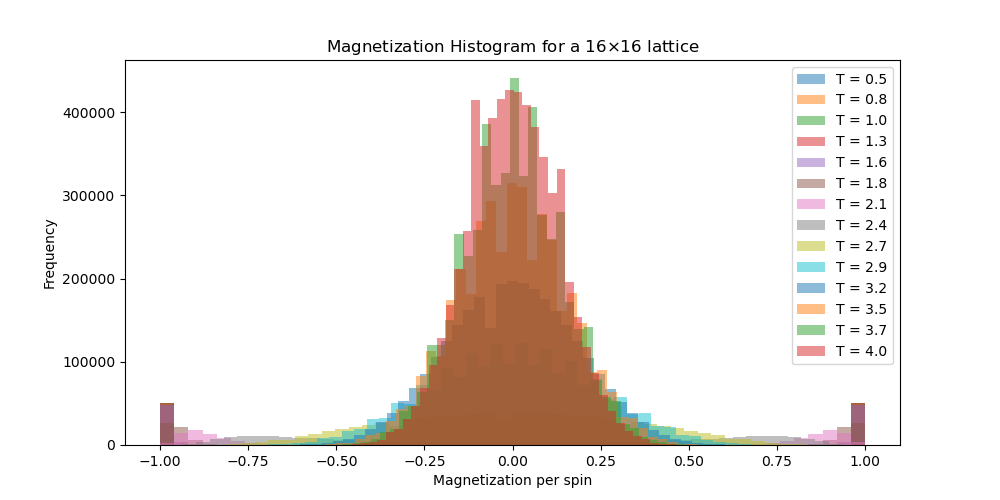
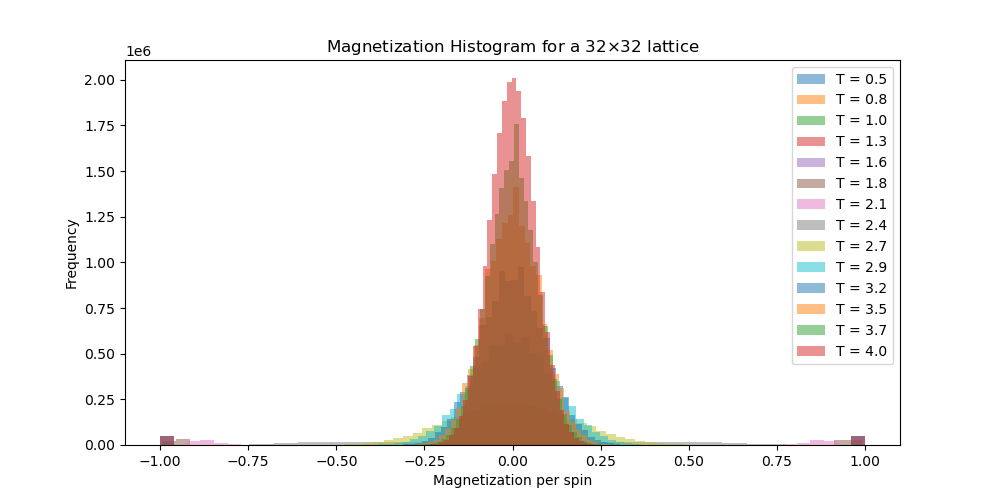

Como podemos notar, el cálculo tuvo que ser abortado para la red de 64x64 debido a limitaicones del sistema en el cual se estuvo corriendo el código. Sin embargo, podemos notar la tendencia en los histogramas de la magnetizatición a que se incrementa la frecuencia o cantidad de estados a medida que la temperatura lo hace. Por lo que ahora veremos el gráfico de los Binder Cumulants.

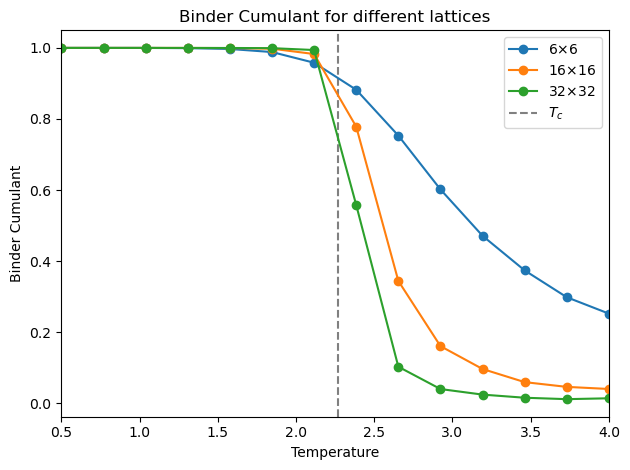

In [14]:
plot_Binder_Cumulants(T_values, binder_cumulants_dict)

En cuanto al Binder Cumulant, los resultados no muestran una buena interesección sobre $T_c$, esto podría deberse a la cantidad de puntos utilizados para generar los valores de $T$, 14 en nuestro caso, por lo que si se aumentara la cantidad de puntos, podría haber una mayor concordancia respecto a resultados esperados y los obtenidos en el problema 2.

# Comentarios Finales

Si bien los tiempos de cálculo para algunas funciones son bastante altos, se realizaron diversos intentos por optimizarlo, desde reducir la cantidad de *loops* dentro de las definiciones de las funciones requeridas, el uso del módulo ```Cython``` para traducir el código a ```C```, también el uso del módulo ```numba```, incluso en algunas iteraciones se utilizó ```cupy``` para correr el código en una GPU en lugar de una CPU. Sin embargo, la mayoría de las funciones para cada problema se realizaron utilizando el módulo ```joblib``` para optimizar la ejecución del código utilizando varios núcleos del procesador a la vez.

El código de este trabajo sin dudas puede ser optimizado, sin embargo debido a mi falta de expertiz sería necesario aún más tiempo del ya otorgado para realizarlo. Finalmente, hubieron algunas iteraciones en las cuales se intentó escribir el código en ```C++```, sin grandes resultados en algunos casos, por lo cual, debido a limitaciones de tiempo, se decidió abortar este approach.